### O que fazer quando a suposição do teste estatístico não é satisfeita?

Neste estudo de caso usaremos o dataset Tooth Growth disponível no pacote datasets em R Esse dataset contém um conjunto de registros com informações sobre o comprimento dos  dentes  de  Porcos  da  Guiné.  Pesquisadores  ministraram  diferentes  doses  de 2  tipos  de suplementos vitamínicos em 60 porquinhos e avaliaram o resultado no crescimento dos dentes dos animais.  Com base nesses dados iremos responder à seguinte pergunta:
**Há diferença significativa no crescimento dos dentes de acordo com o tipo de suplemento usado nos Porcos da Guiné?**


In [1]:
#Carregando pacotes
library(ggplot2)
library(GGally) # oferece funções adicionais para criar gráficos de matriz e visualizações de dados

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'GGally' was built under R version 4.2.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
dados <- ToothGrowth
dim(dados)
head(dados)

[1] 60  3

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


### Variáveis:
- len: Comprimento do crescimento dentário.
- supp: Tipo de suplemento (VC ou OJ): 
    VC: Vitamina C;
    OJ: Suco de laranja
- dose: Dose de vitamina C (0.5 ou 1.0).

In [3]:
colSums(is.na(dados))

len supp dose 
   0    0    0

In [4]:
str(dados)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [5]:
summary(dados)

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

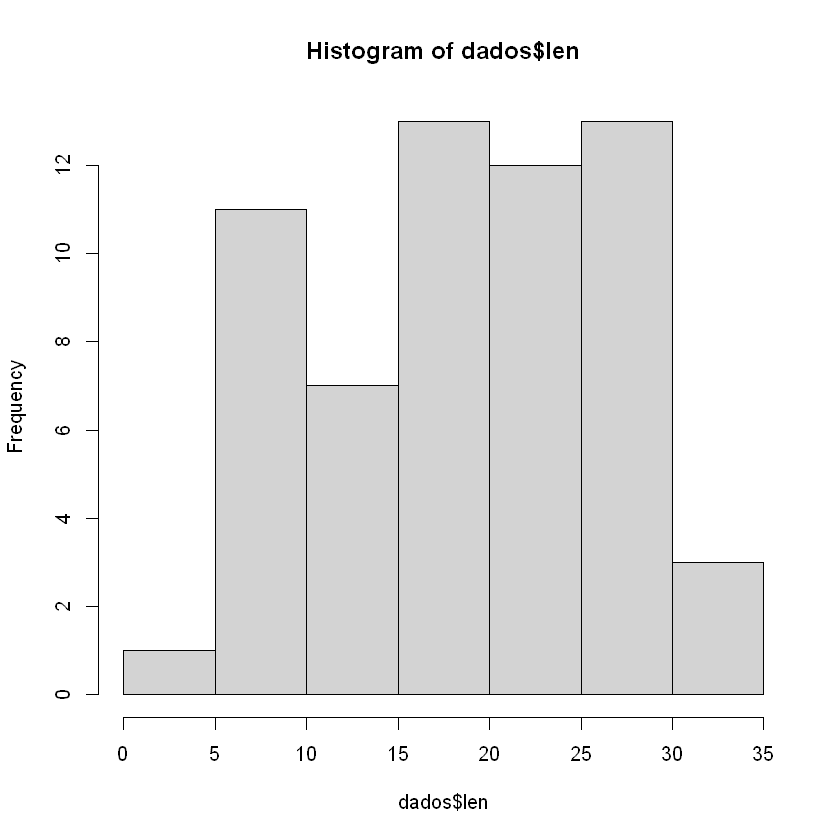

In [6]:
hist(dados$len)

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


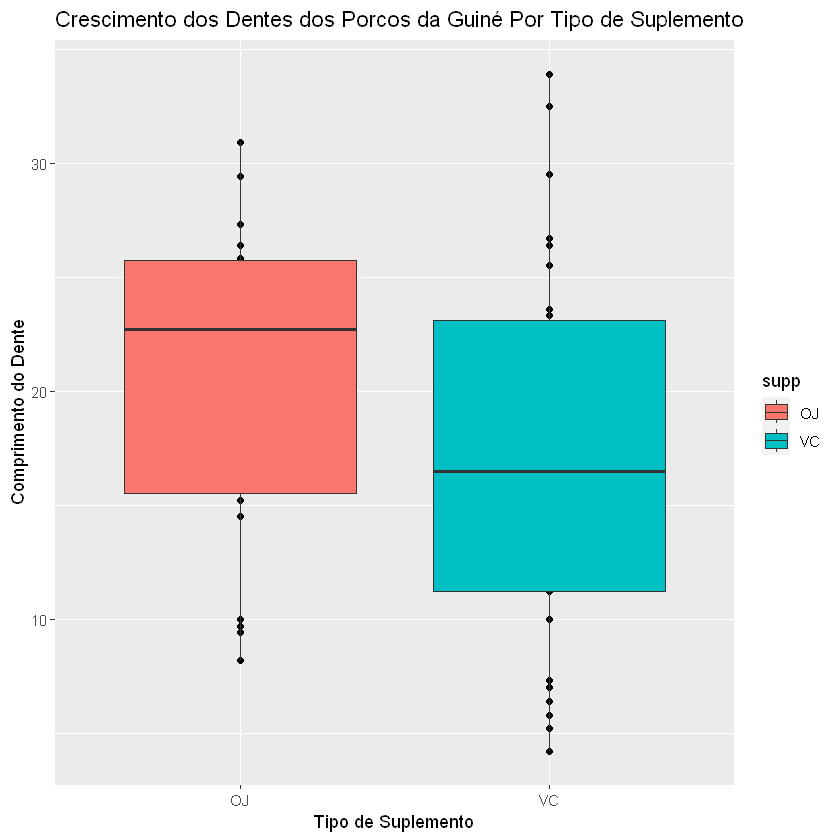

In [7]:
# Boxplots por tipo de suplemento
qplot(supp,
      len,
      data = dados, 
      main = "Crescimento dos Dentes dos Porcos da Guiné Por Tipo de Suplemento",
      xlab = "Tipo de Suplemento", 
      ylab = "Comprimento do Dente") + 
  geom_boxplot(aes(fill = supp))

### Analisando os boxplots parece haver uma diferença no crescimento dos dentes, associada ao tipo de suplemento. Precisamos validar.

- Há diferença significativa no crescimento dos dentes de acordo com o tipo de suplemento usado nos Porcos da Guiné?
    Solução 1: Aplicar um Teste t de amostras independentes a fim de verificar se os tipos de suplementos tem impacto no crescimento dos dentes dos animais. Hipóteses para o Teste t:  

- H0 (Hipótese Nula) – Não há diferença significativa entre as médias dos 2 grupos (logo o tipo de suplemento não tem impacto no crescimento dos dentes)
- H1 (Hipótese Alternativa) – Há diferença significativa entre as médias dos 2 grupos (logo o tipo de suplemento tem impacto no crescimento dos dentes)

**Antes de aplicar o Teste t primeiro precisamos validar as 5 suposições do Teste.**  

1: Os dados são aleatórios e representativos da população.  
2: A variável dependente é contínua.  
3: Ambos os grupos são independentes (ou seja, grupos exaustivos e excludentes).  
4: Os resíduos do modelo são normalmente distribuídos.  
5: A variância residual é homogênea (princípio da homocedasticidade).  

**Para o nosso exemplo neste estudo de caso, iremos considerar como verdadeiras as suposições de 1 a 3 e validaremos as suposições 4 e 5. Para a suposição 4 usaremos o Teste de Shapiro-Wilk e para a suposição 5 usaremos o Teste F.**

**O teste de Shapiro-Wilk** é usado antes do Teste t em alguns casos para verificar se os dados seguem uma distribuição normal. A razão para isso é que o Teste t assume que os dados seguem uma distribuição normal. Quando os dados não seguem uma distribuição normal, a aplicação do Teste t pode ser inadequada e fornecer resultados imprecisos.

A homocedasticidade se refere à suposição de que as variâncias das diferentes amostras (ou grupos) são iguais, ou seja, as variações em torno das médias são consistentes em todos os grupos. Isso é uma parte importante das suposições para a aplicação adequada do Teste t. **O Teste F** é frequentemente usado para verificar a homocedasticidade, testando se as variâncias entre as amostras são estatisticamente iguais antes de aplicar o Teste t.

### Hipóteses do Teste F:

- H0(Hipótese Nula)= As médias de dados extraídos de uma população normalmente distribuída têm a mesma variância.
- HA (Hipótese Alternativa)= As médias de dados extraídos de uma população normalmente distribuída não têm a mesma variância.

In [8]:
#Aplicando teste F, variável len como dependente, variável supp = independente;
var.test(len ~ supp, data = dados)


	F test to compare two variances

data:  len by supp
F = 0.6386, num df = 29, denom df = 29, p-value = 0.2331
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3039488 1.3416857
sample estimates:
ratio of variances 
         0.6385951 


O valor-p é maior que 0.05. Falhamos em rejeitar a H0. **Não há diferença significativa entre as variâncias dos 2 grupos**

### Shapiro-Wilk
Assim como a maioria dos testes estatísticos, o Teste de Shapiro-Wilk formula duas hipóteses:

- H0(Hipótese Nula)= Os dados seguem uma distribuição normal.
- HA (Hipótese Alternativa)= Os dados não seguem uma distribuição normal.

In [9]:
# Aplicando o teste de Shapiro-Wilk à variável len apenas para as observações onde o suplemento é  vitamina C.
shapiro.test(dados$len[dados$supp =='VC']) 


	Shapiro-Wilk normality test

data:  dados$len[dados$supp == "VC"]
W = 0.96567, p-value = 0.4284


In [10]:
# Aplicando o teste de Shapiro-Wilk à variável len apenas para as observações onde o suplemento é suco de laranja
shapiro.test(dados$len[dados$supp =='OJ'])


	Shapiro-Wilk normality test

data:  dados$len[dados$supp == "OJ"]
W = 0.91784, p-value = 0.02359


- O valor-p do primeiro grupo é maior que 0.05. Falhamos em rejeitar a H0.
- O valor-p do primeiro grupo é menor que 0.05. Rejeitamos a H0.**Os dados não seguem uma distribuição normal**

### Uma das suposições do Teste t não foi satisfeita e o teste não pode ser usado.

In [11]:
# Aplicamos o Teste t para suposições:
#Variavel len: dependente; variável supp: indepedente.
t.test(len ~ supp, data = dados, var.equal = TRUE)


	Two Sample t-test

data:  len by supp
t = 1.9153, df = 58, p-value = 0.06039
alternative hypothesis: true difference in means between group OJ and group VC is not equal to 0
95 percent confidence interval:
 -0.1670064  7.5670064
sample estimates:
mean in group OJ mean in group VC 
        20.66333         16.96333 


In [12]:
#Divindo a coluna len com base no suplemento, comprimentos respectivos do suplemento OJ e VC
OJ <- dados$len[dados$supp =='OJ']
VC <- dados$len[dados$supp =='VC']

### Teste t Bilateral(diferença):
Também conhecido como teste de duas caudas.

**Este é um teste t bilateral (dois lados), onde a hipótese nula é que não há diferença significativa entre as médias das duas amostras (OJ e VC)**
- Hipótese nula: μOJ=μVC
- Hipótese alternativa: μOJ≠μVC

In [13]:
t.test(OJ,VC, paired=FALSE, var.equal = FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  OJ and VC
t = 1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1710156  7.5710156
sample estimates:
mean of x mean of y 
 20.66333  16.96333 


### Teste t Unilateral (Maior):
Também conhecido como teste de uma cauda direita.  

**O argumento alternative = 'greater' especifica que estamos interessados em testar se a média da amostra OJ é significativamente maior que a média da amostra VC**
- Hipótese nula: μOJ ≤ μVC
- Hipótese alternativa: μOJ > μVC

In [14]:
t.test(OJ, VC, alternative = 'greater')


	Welch Two Sample t-test

data:  OJ and VC
t = 1.9153, df = 55.309, p-value = 0.03032
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4682687       Inf
sample estimates:
mean of x mean of y 
 20.66333  16.96333 


### Como estamos interessados interessado apenas em saber se há uma diferença significativa em qualquer direção, o teste bilateral seria o mais adequado.
Agora se esperassemos que a média da amostra OJ seja significativamente maior do que a média da amostra VC, o teste unilateral (maior) pode ser mais apropriado. ado.

**O valor-p do teste é 0.06063, logo, maior que 0.05. Falhamos em rejeitar a H0.** Podemos concluir que os 2 grupos não tem diferença significativa.Ou seja, não há diferença significativa entre os tipos de suplementos aplicados para o crescimento dos Porcos da Guiné.

**A Solução 1 não é válida para esse tipo de problema pois os dados não satisfazem uma das suposições.** Será que a dosagem do suplemento é que realmente faz diferença e não o tipo de suplemento? Vamos verificar!

### Para usar o teste ANOVA, temos as seguintes suposições principais:

- 1:Dentro de cada amostra, as observações são amostradas aleatoriamente e independentemente umas das outras.
- 2:Cada amostra de grupo é extraída de uma população normalmente distribuída.  
**Consideramos a suposição 1 como verdadeira e testaremos a suposição 2.**

In [15]:
#Filtramos os dados em 3 grupos de acordo com a dosagem do suplemento
dose_0_5 <- dados$len[dados$dose == 0.5]
dose_1_0 <- dados$len[dados$dose == 1.0]
dose_2_0 <- dados$len[dados$dose == 2.0]

In [16]:
# Teste de Normalidade Shapiro-Wilk para cada grupo
# H0: Os dados são normalmente distribuídos
# H1: Os dados não são normalmente distribuídos
shapiro.test(dose_0_5) 
shapiro.test(dose_1_0) 
shapiro.test(dose_2_0) 


	Shapiro-Wilk normality test

data:  dose_0_5
W = 0.94065, p-value = 0.2466



	Shapiro-Wilk normality test

data:  dose_1_0
W = 0.93134, p-value = 0.1639



	Shapiro-Wilk normality test

data:  dose_2_0
W = 0.97775, p-value = 0.9019


### O valor-p de todos os grupos é maior que 0.05. Falhamos em rejeitar a H0. As 3 amostras são normalmente distribuídas.

In [17]:
# ANOVA
teste_anova = aov(len ~ dose, dados)
summary(teste_anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         1   2224  2224.3   105.1 1.23e-14 ***
Residuals   58   1228    21.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Valor p é 1.23e-14 menor que 0,05, rejeitamos a hipótese nula. Com base nesta análise unidirecional, a dosagem tem um efeito muito significativo no comprimento do dente.

In [18]:
## O tipo de suplemento pode fazer diferença dependendo da dosagem
modelo_lr = lm(len ~ supp + dose, dados)
summary(modelo_lr)


Call:
lm(formula = len ~ supp + dose, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-6.600 -3.700  0.373  2.116  8.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2725     1.2824   7.231 1.31e-09 ***
suppVC       -3.7000     1.0936  -3.383   0.0013 ** 
dose          9.7636     0.8768  11.135 6.31e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.236 on 57 degrees of freedom
Multiple R-squared:  0.7038,	Adjusted R-squared:  0.6934 
F-statistic: 67.72 on 2 and 57 DF,  p-value: 8.716e-16


## Dosagem X Suplemento

In [19]:
#Filtrando com base na dose e no suplemento
dose_0_5_VC <- dados$len[dados$dose == 0.5 & dados$supp == 'VC']
dose_1_0_VC <- dados$len[dados$dose == 1.0 & dados$supp == 'VC']
dose_2_0_VC <- dados$len[dados$dose == 2.0 & dados$supp == 'VC']

In [20]:
# Teste de Normalidade Shapiro-Wilk para cada grupo
shapiro.test(dose_0_5_VC) 
shapiro.test(dose_1_0_VC) 
shapiro.test(dose_2_0_VC) 


	Shapiro-Wilk normality test

data:  dose_0_5_VC
W = 0.89, p-value = 0.1696



	Shapiro-Wilk normality test

data:  dose_1_0_VC
W = 0.90834, p-value = 0.2698



	Shapiro-Wilk normality test

data:  dose_2_0_VC
W = 0.97328, p-value = 0.9194


In [21]:
#Filtrando com base na dose e no suplemento
dose_0_5_OJ <- dados$len[dados$dose == 0.5 & dados$supp == 'OJ']
dose_1_0_OJ <- dados$len[dados$dose == 1.0 & dados$supp == 'OJ']
dose_2_0_OJ <- dados$len[dados$dose == 2.0 & dados$supp == 'OJ']

In [22]:
# Teste de Normalidade Shapiro-Wilk para cada grupo
shapiro.test(dose_0_5_OJ) 
shapiro.test(dose_1_0_OJ) 
shapiro.test(dose_2_0_OJ) 


	Shapiro-Wilk normality test

data:  dose_0_5_OJ
W = 0.89274, p-value = 0.182



	Shapiro-Wilk normality test

data:  dose_1_0_OJ
W = 0.9266, p-value = 0.4153



	Shapiro-Wilk normality test

data:  dose_2_0_OJ
W = 0.96258, p-value = 0.8148


### O valor-p de todos os grupos é maior que 0.05. Falhamos em rejeitar a H0. As 6 amostras são normalmente distribuídas.

In [23]:
t.test(dose_0_5_OJ, dose_0_5_VC, alternative = 'greater')


	Welch Two Sample t-test

data:  dose_0_5_OJ and dose_0_5_VC
t = 3.1697, df = 14.969, p-value = 0.003179
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.34604     Inf
sample estimates:
mean of x mean of y 
    13.23      7.98 


In [24]:
t.test(dose_1_0_OJ, dose_1_0_VC, alternative = 'greater')


	Welch Two Sample t-test

data:  dose_1_0_OJ and dose_1_0_VC
t = 4.0328, df = 15.358, p-value = 0.0005192
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 3.356158      Inf
sample estimates:
mean of x mean of y 
    22.70     16.77 


In [25]:
t.test(dose_2_0_OJ, dose_2_0_VC, alternative = 'greater')


	Welch Two Sample t-test

data:  dose_2_0_OJ and dose_2_0_VC
t = -0.046136, df = 14.04, p-value = 0.5181
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.1335     Inf
sample estimates:
mean of x mean of y 
    26.06     26.14 


### Após análise, observou-se que, em dosagens inferiores a 2, o consumo de suco de laranja apresenta uma contribuição mais significativa para o crescimento dentário em comparação com o uso de vitamina C isoladamente. No entanto, ao empregar uma dose de 2.0 para ambos os suplementos, não foram identificadas diferenças estatisticamente significantes entre eles.